In [113]:
import pickle
import pandas as pd
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from tensorflow.keras.models import load_model
import pickle
import openpyxl
import tensorflow
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
# Load the model from the pickle file
with open('SVR.pkl', 'rb') as f:
    model = pickle.load(f)
    
    



In [ ]:
print(model)

In [114]:
rawdataset = pd.read_excel('grocery_price.xlsx', index_col=None)
dataset = rawdataset.T
dataset.columns = dataset.iloc[0]
dataset = dataset.drop(dataset.index[0])
dataset['Average'] = round(dataset.mean(axis=1),2)
dataset = dataset.drop(dataset.columns[0:3], axis=1)
dataset = dataset.values

sc = MinMaxScaler(feature_range=(0,1))
scaled_dataset = sc.fit_transform(dataset)

def create_sequences(data, seq_length=60):
  x=[]
  y=[]
  for i in range(seq_length, len(data)):
      x.append(data[i-seq_length:i,0])
      y.append(data[i,0])
  return np.array(x), np.array(y)
x_test, y_test = create_sequences(scaled_dataset)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



# newdataset = preprocess_data(rawdataset)
# newdataset = newdataset[60:]
# newchart = newdataset.copy()
# newchart['Predicted'] = predicted_stock_price

In [115]:

# # Predict the stock price
x_pred = x_test.reshape(x_test.shape[0], x_test.shape[1])
predicted_stock_price = model.predict(x_pred)

# x_pred  = model.predict(x_test)
# y_pred = y_test[-1:]

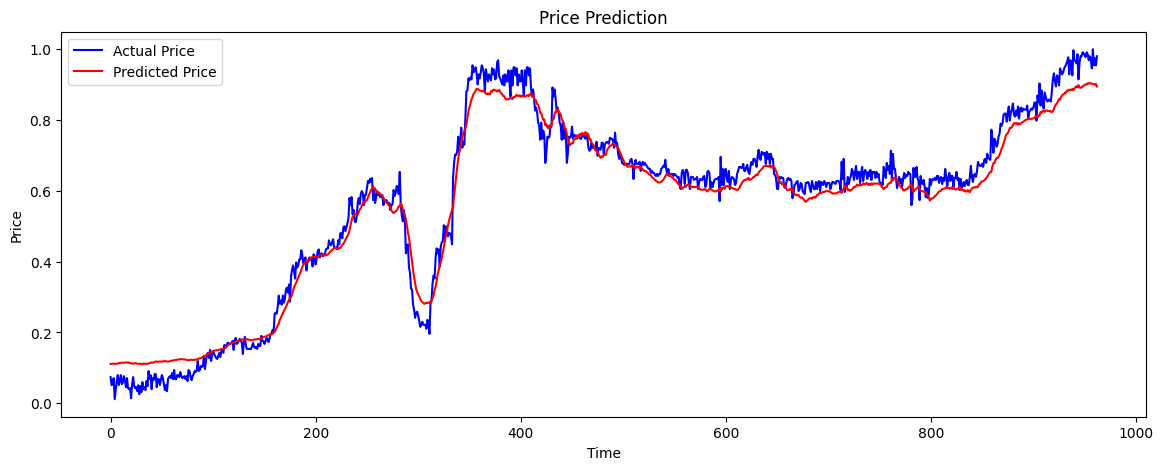

In [116]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [117]:
# Create the array
index = np.arange(len(predicted_stock_price))
predicted_stock_price = np.column_stack((index, predicted_stock_price))
y_test = np.column_stack((index, y_test))


In [118]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test[:,0], y=y_test[:,1], mode='lines', name='Grocery Price', line=dict(color='red')))
fig.add_trace(go.Scatter(x=predicted_stock_price[:,0], y=predicted_stock_price[:,1], mode='lines', name='Predicted Grocery Price', line=dict(color='green')))



In [119]:
mse = mean_squared_error(y_test, predicted_stock_price)
r2 = r2_score(y_test, predicted_stock_price)
print(mse)
print(r2)

0.0009276486971806678
0.9861251595154028
